# Telco Customer Churn Prediction

In this notebook, I use a number of conventional ML approaches to predict customer churn. The ieda is to use these as a benchmark for the DNN-based classifier. We will utilize the following classifiers:
 - Linear Logistic Regression
 - Decision Tree
 - Random Forest classifier 
 - Gradient

<br><br><br>
Load *Pandas*, *SciKit Learn*, *Numpy* and *MatplotLib*: 

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

<br><br><br>
# Load Data

The dataset can be obtained from either [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn) or [IBM](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113).

In [2]:
df = pd.read_csv("telco_customer_churn.csv")
display(df.sample(10))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5832,6017-PPLPX,Male,0,Yes,Yes,20,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.45,1470.95,Yes
1050,1271-SJBGZ,Male,1,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,43.65,526.95,Yes
4938,6413-XKKPU,Male,0,Yes,Yes,17,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,89.40,1539.45,Yes
2203,4815-YOSUK,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),104.90,7537.5,No
5879,6603-YRDCJ,Male,0,Yes,No,33,Yes,No,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Mailed check,61.05,2018.4,No
5831,9846-GKXAS,Female,0,No,No,9,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),90.80,809.75,Yes
4706,6595-COKXZ,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,44.45,44.45,Yes
3696,3144-AUDBS,Female,0,Yes,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,49.15,270.8,Yes
4181,4553-DVPZG,Female,0,Yes,No,62,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.35,6164.7,No
1043,4883-QICIH,Male,0,Yes,Yes,32,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),69.75,2347.9,Yes


<br><br><br>
# Explore the Dataset

Let's explore the dataset and look for any conspecuous dependencies.

## Summary of Features and their Types

In [14]:
print(f"Num Rows: {len(df.index)}")

for col in df.columns:
    if df[col].dtype == np.object:
        print(f"\t{col:24}{str(df[col].dtype):16}{pd.unique(df[col])}")
    else:
        print(f"\t{col:24}{str(df[col].dtype):16}")

Num Rows: 7043
	customerID              object          ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
	gender                  object          ['Female' 'Male']
	SeniorCitizen           int64           
	Partner                 object          ['Yes' 'No']
	Dependents              object          ['No' 'Yes']
	tenure                  int64           
	PhoneService            object          ['No' 'Yes']
	MultipleLines           object          ['No phone service' 'No' 'Yes']
	InternetService         object          ['DSL' 'Fiber optic' 'No']
	OnlineSecurity          object          ['No' 'Yes' 'No internet service']
	OnlineBackup            object          ['Yes' 'No' 'No internet service']
	DeviceProtection        object          ['No' 'Yes' 'No internet service']
	TechSupport             object          ['No' 'Yes' 'No internet service']
	StreamingTV             object          ['No' 'Yes' 'No internet service']
	StreamingMovies         object  

## Does "TotalCharges" contain any useful/extra information? 

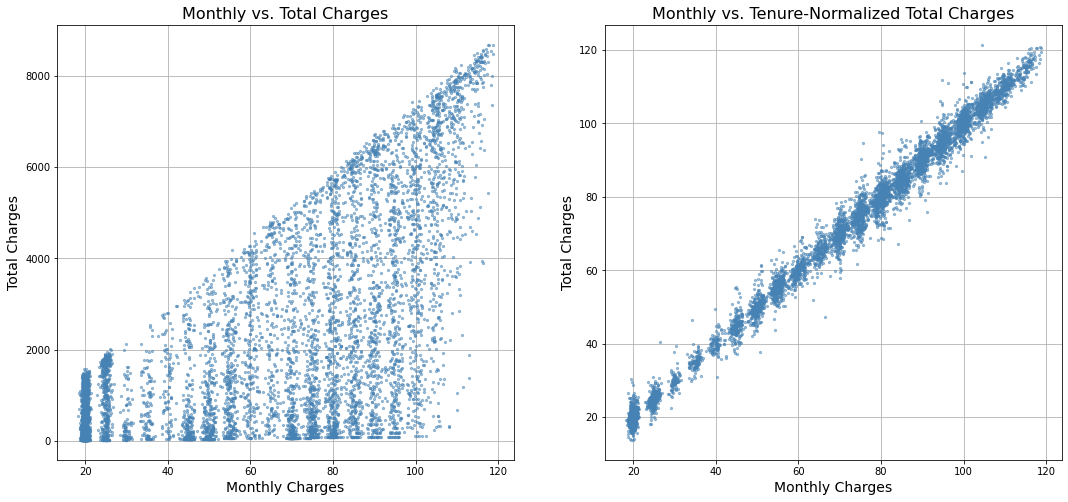

In [25]:
nan_total_charges = pd.to_numeric(df["TotalCharges"], errors="coerce").isnull().values
monthly_charges = df[~nan_total_charges]["MonthlyCharges"].values
tenure = df[~nan_total_charges]["tenure"].astype("float").values
total_charges = pd.to_numeric(df[~nan_total_charges]["TotalCharges"], errors="raise").values

fig = plt.figure(figsize=(18., 8.))
#
ax = plt.subplot(1, 2, 1)
ax.set_title("Monthly vs. Total Charges", fontsize=16)
ax.scatter(monthly_charges, total_charges,  
           marker="o", s=5.0, c="steelblue", alpha=0.5)
ax.set_xlabel("Monthly Charges", fontsize=14)
ax.set_ylabel("Total Charges", fontsize=14)
ax.grid()
ax.set_axisbelow(True)
#
ax = plt.subplot(1, 2, 2)
ax.set_title("Monthly vs. Tenure-Normalized Total Charges", fontsize=16)
ax.scatter(monthly_charges, total_charges / tenure, 
           marker="o", s=5.0, c="steelblue", alpha=0.5)
ax.set_xlabel("Monthly Charges", fontsize=14)
ax.set_ylabel("Total Charges", fontsize=14)
ax.grid()
ax.set_axisbelow(True)
#
plt.show()

## Visual Inspection of Dependence on Various Features:

In [4]:
churn = df["Churn"].apply(lambda x: True if x == "Yes" else False).values
print(f"Customor Churn: {np.sum(churn)} / {np.prod(churn.shape)} = {np.round(np.sum(churn)/np.prod(churn.shape), 2)}")

Churn: 1869 / 7043 = 0.27


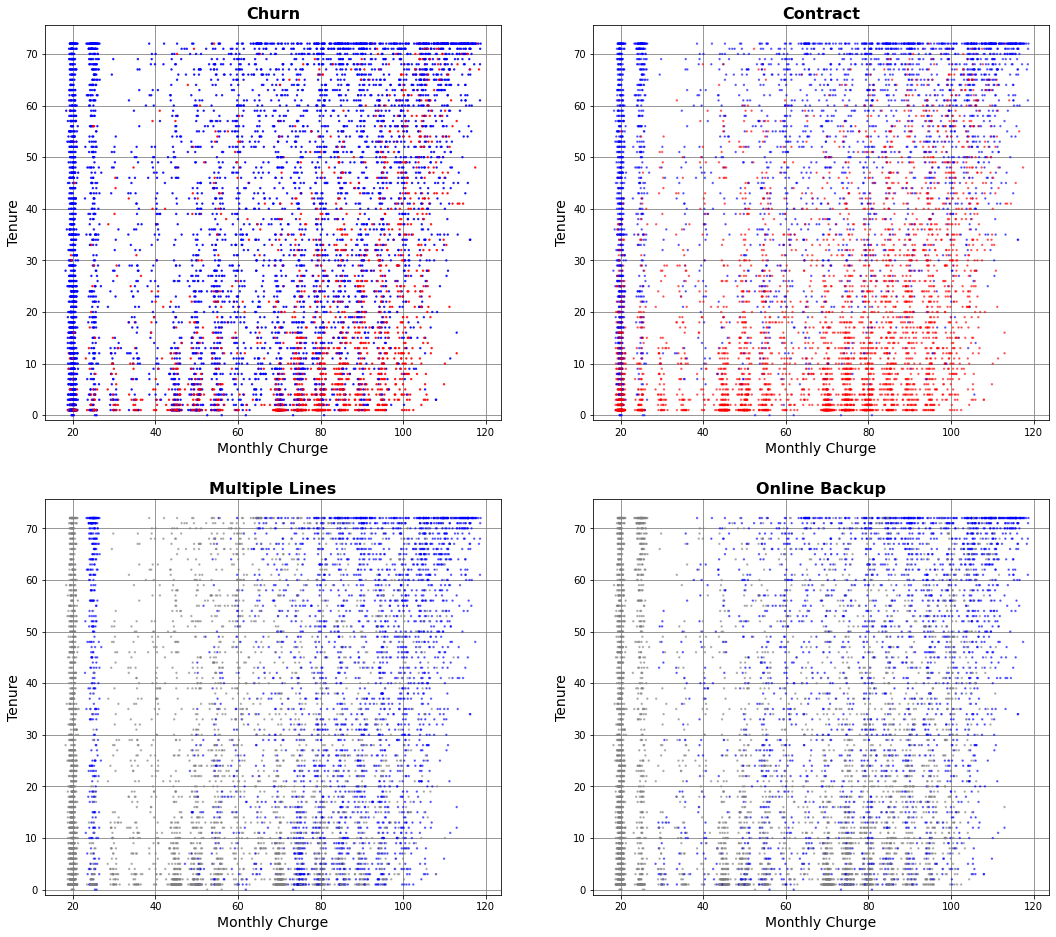

In [13]:
fig = plt.figure(figsize=(18., 16.))
monthly_charges = df["MonthlyCharges"].values.astype(np.single)
tenure = df["tenure"].values.astype(np.single)
#
ax = plt.subplot(2, 2, 1)
ax.set_title("All (Left: red, Stayed: blue)", fontsize=16, fontweight="bold")
ax.set_xlabel("Monthly Churge", fontsize=14.)
ax.set_ylabel("Tenure", fontsize=14.)
ax.scatter(
    monthly_charges, tenure,
    marker="o", s=2.0, alpha=0.8, c=np.where(churn, "red", "blue").tolist())
ax.set_ylim(-1,)
ax.grid(color="gray")
ax.set_axisbelow(True)
#
ax = plt.subplot(2, 2, 2)
ax.set_title("Contract", fontsize=16, fontweight="bold")
ax.set_xlabel("Monthly Churge", fontsize=14.)
ax.set_ylabel("Tenure", fontsize=14.)
ax.scatter(
    monthly_charges, tenure,
    marker="o", s=2.0, alpha=0.5, c=np.where(contract, "blue", "red").tolist())
ax.set_ylim(-1,)
ax.grid(color="gray")
ax.set_axisbelow(True)
#
ax = plt.subplot(2, 2, 3)
ax.set_title("Multiple Lines", fontsize=16, fontweight="bold")
ax.set_xlabel("Monthly Churge", fontsize=14.)
ax.set_ylabel("Tenure", fontsize=14.)
ax.scatter(
    monthly_charges, tenure,
    marker="o", s=2.0, alpha=0.5, c=np.where(multiple_lines, "blue", "gray").tolist())
ax.set_ylim(-1,)
ax.grid(color="gray")
ax.set_axisbelow(True)
#
ax = plt.subplot(2, 2, 4)
ax.set_title("Online Backup", fontsize=16, fontweight="bold")
ax.set_xlabel("Monthly Churge", fontsize=14.)
ax.set_ylabel("Tenure", fontsize=14.)
ax.scatter(
    monthly_charges, tenure,
    marker="o", s=2.0, alpha=0.5, c=np.where(online_backup, "blue", "gray").tolist())
ax.set_ylim(-1,)
ax.grid(color="gray")
ax.set_axisbelow(True)
#
plt.show()

<br><br><br>
# Linear Logstic Regression

<br><br><br>

# Decision Tree Classfier

<br><br><br>
# Random Forest Classfier

<br><br><br>
# Gradient Bosting Classifier